In [ ]:
import pandas as pd

In [ ]:
songs = pd.Series(['ss', 'xx', 'yy', None], name='something')
songs.count()

In [ ]:
print(songs[0])
songs.index

In [ ]:
songs3 = pd.Series([145, 142, 38, 13],
                   name='counts',
                   index=['Paul', 'John', 'George', 'Ringo'])
songs3[1]

In [ ]:
mask = songs3 > songs3.median()
mask
# songs3[songs3 > songs3.median()]

In [ ]:
george_dupe = pd.Series([10, 7, 1, 22],
                        index=['1968', '1969', '1970', '1970'],
                        name='George Songs')

In [ ]:
george_dupe['1970']

# to iterate over series elements - for both index and value

In [ ]:
for item, val in george_dupe.iteritems():
    print(item, val)

for curItem in george_dupe.iteritems():
    print(curItem[0], curItem[1])

    

# If we just want to iterate over values but not index

In [ ]:
for item in george_dupe:
    print(item)

for item in george_dupe.keys():
    print(item)

    

Arithmetic:
python list when multiplied by scalar repeats the elements twice. 
Whereas with numpy and pandas, it multiplies each element by 2. To do this with lists, we need to use list comprehension.  

In [ ]:
x = pd.Series([1,2,3])
x//2

In [ ]:
If series is created with an index, For the None elements in at least one series, it results in Nan
To get rid of this, we can use fillna

In [ ]:
x = pd.Series([10, 7, 1, None],
              index=['1968', '1969', '1970', '1971'],
              name='George Songs 1')

y = pd.Series([100, 70, 10, 220],
              index=['1968', '1969', '1970', '1971'],
              name='George Songs 2')

x + y

x.fillna(0) + y.fillna(0)

y > 10

y[y > 10]

x < y

# Access elements

Use direct bracket syntax
get method that provides default value
get_value method that raises exception when value is not found : This is deprecated. use .at[] or .iat
.iat is for numeric index (below the length of the index.. this is not the series index we defined while creation)
use dot syntax for which the index follows proper naming convention

In [ ]:

songs_66 = pd.Series([3, None , 11, 9, 33],
index=['George', 'Ringo', 'John',  '9999','John' ],
name='Counts')

print('dot access', songs_66.George)
# songs_66.9999 --This wont work
print('index access' ,songs_66['John'])
# songs_66.get_value('ddd') -- throws IndexError
# songs_66.get_value('Ringo') --This is deprecated
print('at',songs_66.at['John'])
print('iat',songs_66.iat[2])
print('get', songs_66.get('ddd','does not exist'))


# Update values in Series

at will update the value in place: also this will update all values with the same key name
if we want to update only one value out of all the keys, use iloc
if the key is not present, a new entry will be added
or we can just use index


In [ ]:
print(songs_66)
positions = [pos for pos, x in enumerate(songs_66.iteritems()) \
    if x[0] == 'John']
print(positions)

songs_66[positions] = 0  # using index
songs_66['9999'] = '999'
songs_66.at['Ringo'] =   20 
songs_66.iat[2] = 55
songs_66

# songs_66.set_value('John', 20) Deprecated

## Reset_index
By default, the .reset_index method will return a new data frame (not a series). It moves the current index values to a column named index

To get a series out, pass True to the drop parameter, which will drop the
index column

We can reindex with different set of names or rename a particular index key


In [ ]:
songs_66.reset_index()
# songs_66

In [ ]:
songs_66.reset_index(drop=True)

# Counts
series.count returns the count of not null values
series.value_counts returns the counts of each value. This is useful for histogram


In [ ]:
songs_66.iat[0] = None 
print('Count with none' , songs_66.count())  
songs_66.iat[0] = 999 
print('value_counts ' , songs_66.value_counts())   
print('unique values ' , songs_66.unique()) 
print('Count of unique values' , songs_66.nunique()) 
songs_66

In [ ]:
#To check if there are duplicate values in a series

print('duplicate indicator ', songs_66.duplicated())
# this returns duplicate for second duplicate entry..
songs_66.drop_duplicates()  # drops duplicate entries

# for index duplicates
scores3 = pd.Series(
    [67.3, 100, 96.7, None, 100, 79],
    index=['Ringo', 'Paul', 'George', 'Peter', 'Billy', 'Paul'])

scores3.groupby(scores3.index).first()  # here paul 100 is retained
scores3.groupby(scores3.index).last()  # here paul 79 is retained

#Statistics

Most of the methods that perform a calculation ignore NaN. Some also
provide an optional parameter—skipna—to change that behavior.
But in practice if you do not ignore NaN, the result is nan:
>songs_66.sum(skipna=False)

>nan

Mean and median ignore none values

In [ ]:
#Statistics
songs_66[4]=None
print(songs_66)
print('Sum ', songs_66.sum())
print('Mean ', songs_66.mean())
print('Median ', songs_66.median())
print('Median with nulls ', songs_66.median(skipna=False)) # this is of no use.. it will be null





For non-normal distributions, the median is useful as a summary
measure. It is more resilient to outliers.

To get a good overall feel for the series, the .describe method presents
a good number of summary statistics and returns the result as a series. It
includes the count of values, their mean, standard deviation, minimum and
maximum values, and the 25%, 50%, and 75% quantiles


In [ ]:
songs_66.quantile()
songs_66.quantile(.1)
songs_66.describe()
songs_66.describe(percentiles=[.05, .1, .2])
songs_66.min()
songs_66.idxmin()
songs_66.max()
songs_66.idxmax()

Variance
Though the minimum and maximum are interesting values, often they
are outliers. In that case, it is useful to find the spread of the values taking
into account the notion of outliers. Variance is one of these measures. A
low variance indicates that most of the values are close to the mean

Standard Deviation
The square root of the variance is known as the standard deviation. This
is also a common measure to indicate spread from the mean. In a normal
distribution, 99% of the values will be within three standard deviations
above and below the mean:

Mean Absolute Deviation:
Another summary statistic for describing dispersion is the mean
absolute deviation. In pandas this is calculated by averaging the absolute
values of the difference between the mean and the values

In [ ]:
songs_66.var()

In [ ]:
songs_66.std()

In [ ]:
songs_66.mad()

Skew is a summary statistic that measures how the tails behave. A
normal distribution should have a skew around 0. A negative skew
indicates that the left tail is longer, whereas a positive skew indicates that
the right tail is longer.

In [ ]:
songs_66.skew()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
songs_66.hist(ax=ax)
fig.savefig('song-hist.png')

Kurtosis is a summary measure that describes how narrow the “peak” of
is distribution is. The larger the number, the narrower the peak is.
Normally, this value is reported alongside skew. The .kurt method returns
nan if there are fewer than four numbers

In [ ]:
songs_66.kurt()

Covariance is a measure of how two variables change together. If they
tend to increase together, it will be positive. If one tends to decrease while
the other increases, it will be negative

In [ ]:
songs_69 = pd.Series([18, 22, 7, 5],
 index=[ 'John', 'Paul', 'George', 'Ringo'],
 name='Counts')

songs_66.cov(songs_69)


When the covariance is normalized (by dividing by the standard
deviations of both series), it is called the correlation coefficient. The .corr
method gives the Pearson Correlation Coefficient. This value is a number
from -1 to 1. The more positive this value is, the greater the correlation.
The more negative it is, the greater the inverse correlation. A value of zero
indicates no correlation:

In [ ]:
songs_66.corr(songs_69)

The autocorrelation measure describes the correlation of a series with
itself shifted one position. 1 indicates perfect correlation, and -1 indicates
anti-correlation. Here is another case where the sample size is small, so
take these with a grain of salt. Note that .autocorr does not ignore NaN
by default

In [ ]:
songs_66.autocorr()
songs_66.dropna().autocorr()

Often, the cumulative sum of a series is needed. The .cumsum method
provides this. In addition, there are analogous operations for cumulative
product and cumulative minimum

In [ ]:
songs_66.cumsum()
songs_66.cumprod()
songs_66.cummin()

In [ ]:
Convert Types

The series object has the ability to tweak its values. The numerical values
in a series may be rounded up to the next whole floating point number by
using the .round method. Note that even though the value is rounded, the type is still a float.

Numbers can be clipped between lower and upper thresholds using the
.clip method. This method does not change the type either

Convert types to other data type
songs_66.astype(str)


ages.astype(int)  : this fails when data has null or invalid integers and even for floats
pd.to_numeric(ages) : *SAFE* This works for floats, integers and None as well.
pd.to_datetime: To convert to date and time
    
to_numeric has errors parameter that will ignore, raise or coerce the conversion
in case of coerce, the values are set to NaN. In case of ignore, original values remain


In [ ]:
songs_66.round()

In [ ]:
songs_66.clip(lower=80, upper=90)

In [ ]:
songs_66.clip(lower=80, upper=90).std()

In [ ]:
songs_66.astype(str)  # now max is based on lexicographic

In [ ]:
ages = pd.Series(['12','13', None, 'Hello'], index = ["first", "second", "third","fourth"])
# ages.astype(int)
pd.to_numeric(ages, errors="coerce")  #default values for errors is coerce as of now
# print(pd.__version__)

#Dealing with None
Either we can use fillna or dropna
we can get null array or not null array using series.isnull/notnull.
or we can get null array and use ~array to get not null values

Locating the position of the first and last valid index values is simple as
well, using the .first_valid_index and .last_valid_index methods
respectively:
>>> songs_66.first_valid_index()
'George'
>>> songs_66.last_valid_index()
'Paul'

In [ ]:
songs_66.fillna(-1)

In [ ]:
songs_66.dropna()

In [ ]:
#Matrix operations
songs_66.dot(songs_69) : Returns Nan if there is one Nan
songs_66.dropna().dot(songs_66.dropna()) :Use this rather
x.T or x.transpose does not have any impact on series as it is only for matrix

In [ ]:
songs_66.dropna().dot(songs_66.dropna())

#Append, combining, and joining two series
songs_66.append(songs_69)

The .append method will create duplicate indexes by default (as seen by
the multiple entries for Paul above). .append has an optional parameter,
verify_integrity, which when set to True to complain if index values
are duplicated

To perform element-wise operations on series, use the .combine
method. It takes another series, and a function as its’ parameters. The
function should accept two parameters and perform a reduction on them.
Below is one way to compute the average of two series using .combine



In [ ]:
def avg(v1, v2):
    return (v1 + v2)/2.0

In [ ]:
print(songs_66)
print(songs_69)
songs_66.combine(songs_69, avg)

In [ ]:
songs_66.update(songs_69) #Replace values with second series in place
songs_66

#Sorting
orig.sort_values()

We can mention kind of sort to use
Merge sort does not rearrange index if the value is already in right place
Whereas other sorting algorithms move them
we can also specific if ascending be false

sort_index is another 

Another useful sorting related method is .rank. This method ranks the
index by the values of the entries. It assigns equal weights for ties. It also
supports the ascending parameter to reverse the order


In [ ]:
s = pd.Series([2, 2, 2], index=['a2', 'a1', 'a3'])
s.sort_values(kind='mergesort')
s.sort_values(kind='heapsort')

In [ ]:
songs_66.sort_values(ascending=False)
songs_66

In [ ]:
songs_66.sort_index()

In [ ]:
songs_66.rank()

#Processing each element

Applying a function
Often the values in a series will need to be altered, cleaned up, checked, or
have an arbitrary function applied to them. The .map method applies a
function to every item in the series

In [ ]:
def format(x):
    if x == 1:
        template = '{} song'
    else:
        template = '{} songs'
    return template.format(x)


songs_66.map(format)

In [ ]:
In addition to accepting a function, the .map function also accepts a
dictionary. In that case, any value of the series matching a key in the
dictionary will be updated to the corresponding value for the key:

In [ ]:
songs_66.map({5: None,
18.: 21,
 22.: 23})

Similarly, the .map will accept a series, treating it much like a
dictionary. Any value of the series that matches the passed in index value
will be updated to the corresponding value

There is also an .apply method on the series object. It behaves very
similar to .map, but it only works with functions (not with series nor
dictionaries).


In [ ]:
mapping = pd.Series({22.: 33})

In [ ]:
songs_66.map(mapping)

#write to file
there is a provision to write a series to file or string using write_csv


#String operations
A series that has string data can be manipulated by vectorized string
operations. Though it is possible to accomplish these same operations via
the .map or .apply methods, prudent users will first look to see if a built-in
method is provided. Typically, built-in methods will be faster because they
are vectorized and often implemented in Cython, so there is less overhead.
Using .map and .apply should be thought of as a last resort, instead of the
first tool you reach for.

To invoke the string operations, simply invoke them on the .str
attribute of the series:

In [ ]:
names = pd.Series(['George', 'John', 'Paul'])
names.str.lower()
names.str.len()

#Plotting using matplotlib
Default is line chart. 

These are subplot grid parameters encoded as a single integer. For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot". Alternative form for add_subplot(111) is add_subplot(1, 1, 1)

If we have installed scipy.stats, we can plot a kernel density
estimation (KDE) plot. This plot is very similar to a histogram, but rather
than using bins to represent areas where numbers fall, it plots a curved
line


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
songs_69.plot()
songs_66.plot()
plt.legend()
fig.savefig('/tmp/ex1.png')

In [ ]:
songs_69.name ="Names for 69"
songs_66.name ="Names for 66"
fig = plt.figure()
songs_69.plot(kind='bar')
songs_66.plot(kind='bar', color='k', alpha=.5)
plt.legend()
fig.savefig('/tmp/ex2.png')

In [ ]:
import numpy as np 
data = pd.Series(np.random.randn(500), name='500 random')
fig = plt.figure()
ax = fig.add_subplot(111)
data.hist()   # or we can call ax.hist(data)
fig.savefig('/tmp/ex3.png')

In [ ]:
fig = plt.figure()
data.plot(kind='kde') # requires scipy.stats
fig.savefig('/tmp/ex4.png')

In [ ]:
import scipy
fig = plt.figure()
ax = fig.add_subplot(211)
data.plot(kind='kde', color='b', alpha=.6, ax=ax) # requires
scipy.stats
# normed=True is passed through to matplotlib
data.hist(color='g', alpha=.6, ax=ax, normed=True)
ax.set_title("KDE, Histogram & CDF")
ax = fig.add_subplot(212)
data.hist(ax=ax, normed=True, cumulative=True)
fig.savefig('/tmp/ex5.png')

#DATAFRAMES
To access a row, use iloc
to access a column, use column name

Note the type of column is a pandas Series instance. Any operation that
can be done to a series can be applied to a column


In [ ]:
import pandas as pd
df = pd.DataFrame({
'growth':[.5, .7, 1.2],
'Name':['Paul', 'George', 'Ringo'] })
df

In [ ]:
df.iloc[2]

In [ ]:
df["Name"]

In [ ]:
type(df['Name'])
df['Name'].str.lower()

In [ ]:
#dataframe from dictionary
df= pd.DataFrame([
 {'growth':.5, 'Name':'Paul', 'Age' :23},
 {'growth':.7, 'Name':'George', 'Age': 45},
 {'growth':1.2, 'Name':'Ringo' , 'Age' : 56}])

In [ ]:
#reading from csv
#pd.read_csv(csv_file)

#created from numpy, if column names are not specified, it will be 0,1,2
pd.DataFrame(np.random.randn(10,3) ,  columns=['a', 'b', 'c'])

In [ ]:
df.axes

In [ ]:
#index is 0, column is 1
# 0 means vertical which makes sense in 99% of the cases and default


print(df.apply(np.sum, axis=0))
print(df.apply(np.sum, axis=1)) #thi will fail as it cannot add string to float

In [ ]:
# To view data in horizontal form
print(df.T)

# To view summary statistics
print(df.describe())

# To check if there are any duplicates
df["Name"].value_counts()

# Pearson Correlation Coefficient
df.corr()

In [ ]:
 fig = plt.figure()
 ax = fig.add_subplot(111)
 df.plot(ax=ax)
 fig.savefig('/tmp/df-ex2.png')

In [ ]:
#Concatenate two dataframes ie., one below another. 
#if ignore_index is not set to true, the index will have duplicates

df1 = pd.DataFrame({ "first" : (1 ,22,3) })
df2 = pd.DataFrame({ "first1" : (4 ,5,6) })
df1

df = pd.concat([df1, df2], ignore_index=True)
df["new"]= pd.Series(range(df["first"].fillna(0).count() ))


#adding a new column based on column value
def is_even(val):
    return val%2==0

df['even'] = df['new'].apply(is_even)

print(df)

In [ ]:
#drop rows
df.drop([1,2])  #returns a new df
df
#alternate version that access indexlabels
df.drop(df.index[1:4:2])

In [ ]:
#Deleting Columns
# we can use either syntax. These happen in place
del df["even"]
df.drop(["even"] , axis=1)  #It DOES NOT operate in place
#drop is the preferred way

In [ ]:
df.columns

In [ ]:
data = StringIO('''UPC,Units,Sales,Date
... 1234,5,20.2,1-1-2014
... 1234,2,8.,1-2-2014
... 1234,3,13.,1-3-2014
... 789,1,2.,1-1-2014
... 789,2,3.8,1-2-2014
... 789,,,1-3-2014
... 789,1,1.8,1-5-2014''')

In [ ]:
sales = pd.read_csv("input.csv")

In [ ]:
sales.axes

In [ ]:
sales.columns

In [ ]:
sales["UPC"].unique()

In [ ]:
sales.shape

In [ ]:
#information about dataframe columns and types and memory usage
sales.info()

In [ ]:
#Default iteration is over column names. This can also be done via .keys
for col in sales:
    print(col)

for col in sales.keys():
    print(col)
    
# to check if a column is present in column list
print ('UPC' in sales)

In [ ]:
#The .iteritems method returns pairs of column names and the individual column

for col, ser in sales.iteritems():
    #print(col, ser)
    pass
    
for row in sales.iterrows():
    #print(row)  
    pass

len(sales)  # no. of rows

In [ ]:
#Adding scalar to dataframe
sales[['Sales', 'Units']] + 10

In [ ]:
sales.T

In [ ]:
sales.to_numpy()  #if we want to convert dataframe to numpy array

In [ ]:
#To add an incrementing integer index to a data frame
sales.reset_index()

#to index based on existing column. This will replace index column with the new column and this column will be removed
by_date = sales.set_index('Date')

In [ ]:
by_date.reset_index()  # to put the column back into dataframe

In [ ]:
# to get value from df using row index and column name
sales.at[0, 'Date']  

# if we want to refer with index only; use sales.columns to know the column index
sales.iat[0, 1]  

In [ ]:
# to set value in df using row index and column name
sales.at[0,'Sales'] =9993

# if we want to refer with index only; use sales.columns to know the column index
sales.iat[0,1] =999 

In [ ]:
# to insert a column in desired position. Here last argument could be series
sales.insert(1, 'Category', 'Food')

# if we want to add at the end, we could use assignment
sales["newcolumn"] = "newvalue"

In [ ]:
# if we want to replace a value in data frame with new value for all columns
sales.replace(789,790)

#if we want replace a value only in  particular column
sales.replace({'UPC': {789: 790}, 'Sales': {2.0: 1.4}})

In [ ]:
# to delete a column. it will NOT do it in place
sales.drop(['Category', 'newcolumn'], axis=1)

# if we have fewer columns to retain, use reindex
cols=["UPC", "Date"]
sales.reindex(columns = cols)

In [ ]:
# to get head and tail of 5 rows
sales.tail()

# to get just 1 row
sales.head(1)

In [ ]:
#to get rows based on index
sales.iloc[2:4]

#we can also use row and column together
sales.iloc[2:4, 1:3]

#we can also get it based on index name 
sales.loc[0:3]  # in this case, the index is also numeric

sales.loc[2:, 'Units']

# sales


In [ ]:
# to sort values. DONT use sort method which does in place sort, we can also provide multiple column list
sales.sort_values('UPC', ascending=False)
# to sort index,

sales.sort_index(ascending=False)

In [ ]:
snow = pd.read_csv("f:\\others\\avalanche.csv")

In [104]:
snow.info()
snow.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
year        10 non-null int64
inches      10 non-null float64
location    10 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


,year,inches
count,10.00000,10.000000
mean,2010.50000,454.150000
std,3.02765,138.357036
min,2006.00000,267.500000
25%,2008.25000,356.375000
50%,2010.50000,406.250000
75%,2012.75000,571.750000
max,2015.00000,654.000000


In [ ]:
snow.head(3)

In [ ]:
print("min, max ",snow["year"].min(),snow["year"].max(), snow["year"].quantile())

In [ ]:
snow.quantile([0.1,0.9])

In [ ]:
snow[['inches']].clip(lower=400, upper=600)

In [97]:
snow.corr()

,year,inches
year,1.000000,-0.698064
inches,-0.698064,1.000000


In [98]:
snow.cov()

,year,inches
year,9.166667,-292.416667
inches,-292.416667,19142.669444


In [101]:
snow.sum(numeric_only=True)

year      20105.0
inches     4541.5
dtype: float64

In [102]:
snow.skew()

year      0.000000
inches    0.311866
dtype: float64

In [103]:
snow[['year', 'inches']].idxmax()

year      9
inches    2
dtype: int64

In [107]:
snow.hist()

ValueError: hist method requires numerical columns, nothing to plot.

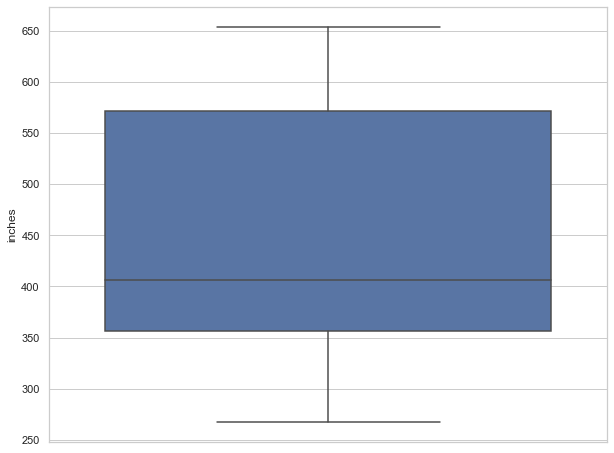

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='inches', data=snow, orient="v")

In [111]:
scores = pd.DataFrame({
'name':['Adam', 'Bob', 'Dave', 'Fred'],
'age': [15, 16, 16, 15],
'test1': [95, 81, 89, None],
'test2': [80, 82, 84, 88],
'teacher': ['Ashby', 'Ashby', 'Jones', 'Jones']})

In [116]:
scores.groupby('teacher').mean()

,age,test1,test2
teacher,,,
Ashby,15.5,88.0,81.0
Jones,15.5,89.0,86.0


In [114]:
scores.groupby(['teacher', 'age']).sum()

test1  test2
teacher age              
Ashby   15    95.0     80
        16    81.0     82
Jones   15     0.0     88
        16    89.0     84

In [117]:
#creating dummy variables
pd.get_dummies(scores, columns=['age'], prefix='age')

,name,test1,test2,teacher,age_15,age_16
0,Adam,95.0,80,Ashby,1,0
1,Bob,81.0,82,Ashby,0,1
2,Dave,89.0,84,Jones,0,1
3,Fred,NaN,88,Jones,1,0


In [120]:
df = pd.read_table("f:\\others\\nameagecolor.tsv", sep="|")

In [121]:
df.isnull()

,Name,Age,Color
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,False


In [122]:
df.dropna()

,Name,Age,Color
0,Fred,22.0,Red
1,Sally,29.0,Blue


In [125]:
df.fillna({'Age': df.Age.median(),
'Color': 'Pink'})

,Name,Age,Color
0,Fred,22.0,Red
1,Sally,29.0,Blue
2,George,24.0,Pink
3,Fido,24.0,Black


In [127]:
df.interpolate()  #fills missing values

,Name,Age,Color
0,Fred,22.0,Red
1,Sally,29.0,Blue
2,George,24.0,NaN
3,Fido,24.0,Black


In [130]:
df1 = pd.DataFrame({'name': ['John', 'George', 'Ringo'], 'color': ['Blue', 'Blue', 'Purple']})
df2 = pd.DataFrame({'name': ['Paul', 'George', 'Ringo'], 'carcolor': ['Red', 'Blue', np.nan]},index=[3, 1, 2])
pd.concat([df1, df2], sort=False).reset_index()

,index,name,color,carcolor
0,0,John,Blue,NaN
1,1,George,Blue,NaN
2,2,Ringo,Purple,NaN
3,3,Paul,NaN,Red
4,1,George,NaN,Blue
5,2,Ringo,NaN,NaN


In [135]:
df.dtypes
df.shape

(4, 3)

In [131]:
pd.concat([df1, df2], axis=1)  #adding columns to df

,name,color,name,carcolor
0,John,Blue,NaN,NaN
1,George,Blue,George,Blue
2,Ringo,Purple,Ringo,NaN
3,NaN,NaN,Paul,Red


In [133]:
df1.merge(df2, how='outer')  #Here how could be left, right as well
# we can also mention column names on which join should happen
# on, left_on, right_on 

,name,color,carcolor
0,John,Blue,NaN
1,George,Blue,Blue
2,Ringo,Purple,NaN
3,Paul,NaN,Red


In [ ]:
#replace column names

df = df.rename(columns={x:x.replace(':', '') for x in df.columns})

In [ ]:
df['depth_inches'] = df.Depth.apply(to_inches)  #create a new column based on other value

In [ ]:
df['vert'] = pd.to_numeric(df.Vertical, errors='coerce')
df['dow'] = df['Occurrence Date'].apply( lambda x: x.split(',')[0])
df.dow.value_counts()
df['lat'] = df.lat.replace(0, float('nan'))
ava95 = df[df.year >= 1995]